In [22]:
import numpy as np
import cv2

import dlib
video_capture = cv2.VideoCapture(0) #Webcam object
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file

img = cv2.imread('tim_roth_images/7173390615_foto-v-pol-lica.jpg')

#img = cv2.imread('me-test\shocked.png')

frame = np.array(img)
    
# To capture image in monochrome
gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(gray)
detections = detector(clahe_image, 1) #Detect the faces in the image

# 1-16 jaw
# 17-21 left eyebrow
leftPartOfLeftEyebrow = 17
rightPartOfLeftEyebrow = 21

# 22-26 right eyebrow
leftPartOfRightEyebrow = 26
rightPartOfRightEyebrow = 22

# 27-35 nose
# 36-41 left eye
# 42-47 right eye

# 48-68 mouth
#upperUpLip 50-52
upperUpLip = 51

#upperDownLip 61-63
upperDownLip = 62
            
#lowerLowLip 56-58
lowerLowLip = 57

#lowerUpLip 65-68
lowerUpLip = 66

# mouth corners
leftMouthCorner = 48
rightMouthCorner = 54

minRange = 17
maxRange = 26

# cv2 settext settings
font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.7
fontColor              = (255,255,0)
lineType               = 2

for k,d in enumerate(detections): #For each detected face
    
    xlist = []
    ylist = []
    
    #print("Face ",k)
    #print("Position: ", d)
    
    shape = predictor(clahe_image, d) #Get coordinates
    
    #drawPoint = 21
    #cv2.circle(frame, (shape.part(drawPoint).x, shape.part(drawPoint).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    
    #print("Coordinates: ")
    for i in range(minRange, maxRange+1): #There are 68 landmark points on each face
        
        xlist.append(float(shape.part(i).x))
        ylist.append(float(shape.part(i).y))
        
        #print("[", i, "]: ", shape.part(i).x, shape.part(i).y)
        #cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    
    for i in range(36, 47+1): #There are 68 landmark points on each face
        
        xlist.append(float(shape.part(i).x))
        ylist.append(float(shape.part(i).y))
        
        #print("[", i, "]: ", shape.part(i).x, shape.part(i).y)
        #cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    
    # Eyebrows down
    if shape.part(leftPartOfLeftEyebrow).y < shape.part(rightPartOfLeftEyebrow).y or shape.part(leftPartOfRightEyebrow).y < shape.part(rightPartOfRightEyebrow).y:
        #for i in range(leftPartOfLeftEyebrow, leftPartOfRightEyebrow): #There are 68 landmark points on each face
                #cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
        cv2.putText(frame,'opuszczone brwi', (shape.part(rightPartOfLeftEyebrow).x, shape.part(rightPartOfLeftEyebrow).y),
                    font, fontScale, fontColor, lineType)
        
    for i in range(48, 68): #There are 68 landmark points on each face
        cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2)
    
    # Crossed mouth
    if not (shape.part(lowerLowLip).y - shape.part(lowerUpLip).y)/2 < shape.part(lowerUpLip).y - shape.part(upperUpLip).y:
        cv2.putText(frame,'zacisniete usta', (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), font, fontScale, fontColor, lineType)
    else:
        # Open mouth
        medUpperLipY = (shape.part(upperDownLip).y + shape.part(upperUpLip).y)/2
        if shape.part(rightMouthCorner).y > medUpperLipY and shape.part(leftMouthCorner).y > medUpperLipY:
            cv2.putText(frame,'otwarte usta', (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), font, fontScale, fontColor, lineType)

    cv2.circle(frame, (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    cv2.circle(frame, (shape.part(lowerLowLip).x, shape.part(lowerLowLip).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    cv2.circle(frame, (shape.part(upperUpLip).x, shape.part(upperUpLip).y), 1, (0,255,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    cv2.circle(frame, (shape.part(upperDownLip).x, shape.part(upperDownLip).y), 1, (0,255,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame

    cv2.circle(frame, (shape.part(leftMouthCorner).x, shape.part(leftMouthCorner).y), 1, (255,255,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
    cv2.circle(frame, (shape.part(rightMouthCorner).x, shape.part(rightMouthCorner).y), 1, (255,255,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame

    #Find both coordinates of centre of gravity
    xmean = np.mean(xlist) 
    ymean = np.mean(ylist)
    
    #Draw lines between
    #for i in range(minRange, maxRange+1):
        #cv2.line(frame, (shape.part(i).x, shape.part(i).y), (int(xmean), int(ymean)), (0,255,0), 1)
        
    cv2.circle(frame, (int(xmean), int(ymean)), 1, (255,0,0), thickness=2)

cv2.imshow("image", frame) #Display the frame

cv2.waitKey(0)
cv2.destroyAllWindows()

27.6666666667


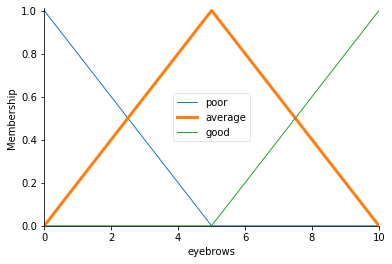

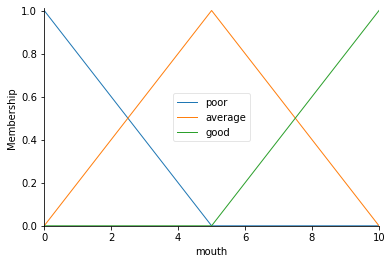

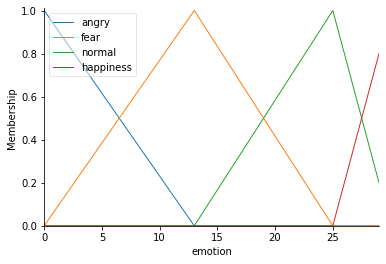

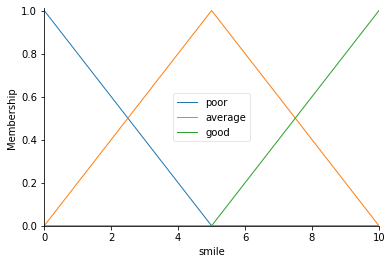

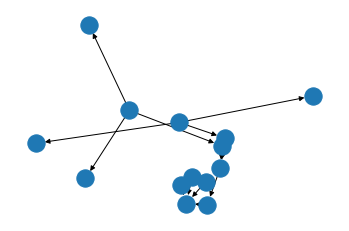

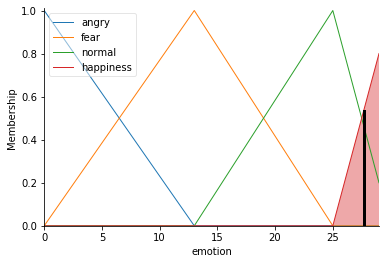

In [87]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
smile = ctrl.Antecedent(np.arange(0, 11, 1), 'smile')
eyebrows = ctrl.Antecedent(np.arange(0, 11, 1), 'eyebrows')
mouth = ctrl.Antecedent(np.arange(0, 11, 1), 'mouth')
emotion = ctrl.Consequent(np.arange(0, 30, 1), 'emotion')

# Auto-membership function population is possible with .automf(3, 5, or 7)
smile.automf(3)
eyebrows.automf(3)
mouth.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
emotion['angry'] = fuzz.trimf(emotion.universe, [0, 0, 13])
emotion['fear'] = fuzz.trimf(emotion.universe, [0, 13, 25])
emotion['normal'] = fuzz.trimf(emotion.universe, [13, 25, 30])
emotion['happiness'] = fuzz.trimf(emotion.universe, [25, 30, 30])

# You can see how these look with .view()
eyebrows['average'].view()
mouth.view()
emotion.view()
smile.view()

rule1 = ctrl.Rule(eyebrows['poor'] & mouth['poor'], emotion['angry'])
rule2 = ctrl.Rule(eyebrows['poor'] & mouth['good'], emotion['fear'])
rule3 = ctrl.Rule(eyebrows['average'] | mouth['average'], emotion['normal'])
rule3 = ctrl.Rule(smile['good'], emotion['happiness'])

rule1.view()

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['eyebrows'] = 6.5
tipping.input['mouth'] = 9.8
tipping.input['smile'] = 9.8

# Crunch the numbers
tipping.compute()

print(tipping.output['emotion'])
emotion.view(sim=tipping)